<a href="https://colab.research.google.com/github/AndreaUrquiza/Teoria/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de señales - Taller 1



_Transformada de Fourier, Sistemas lineales y Modulación_

----

Hallar la ecuación diferencial que describe cada uno de los siguientes circuitos:

<center><img src='taller1.svg' style='width: 70%'></img></center>

  1. Hallar la función de transferencia $h(t)$.
  1. Asumir que a la entrada $x(t)$ hay un **pulso cuadrado**, hallar la salida en tiempo ($y(t)$) y frecuencia ($Y(\omega)$).
  1. Modular la salida del sistema en cada una de las modulaciones vistas en clase (representar la señal modulada en el tiempo y hallar su espectro)


# Función de transferencia

1. Hallar la función de transferencia

In [195]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lti
from scipy.fftpack import fft, fftfreq, fftshift



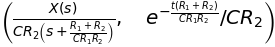

In [196]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R1, R2, C = sym.symbols('t R1 R2 C', positive=True)
X = sym.Function('X')(s)

Y = (1/(R2*C))/(s + ((R2+R1)/(R1*R2*C))) * X

y = sym.inverse_laplace_transform(Y.subs(X, 1), s, t)   #VERIFICACIÓN CON CÓDIGO
Y,y

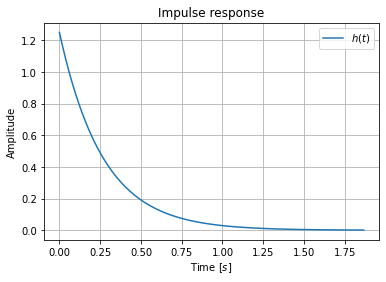

In [257]:
R1 = 1
R2 = 2
C = 0.4
A = 1/(R2*C)
num = [A] 
den = [1,((R2+R1)/(R1*R2*C)) ] 

lti_system = lti(num, den)   
tv, h = lti_system.impulse(N=5004)  #se genera la respuesta impulso del sistema 

plt.plot(tv, h, label='$h(t)$') #se gráfica la respuesta impulso

plt.grid(True)
plt.legend()
plt.title("Impulse response")
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude")
plt.show()
len(tv)

# 2. Si Input signal es $x(t)= rect_{tau} (t)$    

In [383]:
tau= 2
Fs= 834
Nm=tau*Fs

A1 = 1/tau

t1 = np.zeros(1)
t2 = np.zeros(1)

for i in range(len(tv)):
  if 0 < tv[i] <= A1 :
    t1 = np.append(t1, tv[i])
   else 
t1,t2
len(t1),t1[1340],tv[1340]
               




- Se halla la respuesta del sistema ante el pulso cuadrado

In [327]:
plt.figure(figsize=(10, 5), dpi=90)

_, output, _ = lti_system.output(xt, t)
output_c = np.convolve(xt, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.plot(t, xt, '-', C='C0', label='Input')
plt.plot(t, output, '-', C='C1', linewidth=7, alpha=0.3, label='Output (sim)')
plt.plot(t, output_c, '--', C='C2', label='Output (convolve)')

plt.grid(True)
plt.legend()
# plt.xlim(0, 20)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.show()

ValueError: ignored

<Figure size 900x450 with 0 Axes>

- Se determina $X(w)$ escribiendo la transformada de Lpalcade del pulso cuadrado con ancho 0.5 y graficandola

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


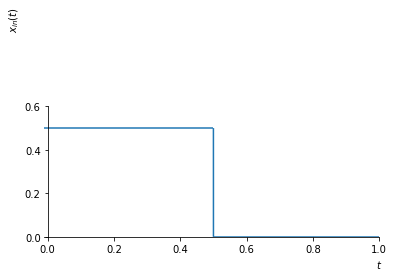

In [199]:
X_in = (A1/s)*(1-sym.exp(-A1*s))
x_in = sym.inverse_laplace_transform(X_in, s, t)
sym.plot(x_in, (t, -0.01, 1), xlabel='$t$', ylabel='$x_{in}(t)$')

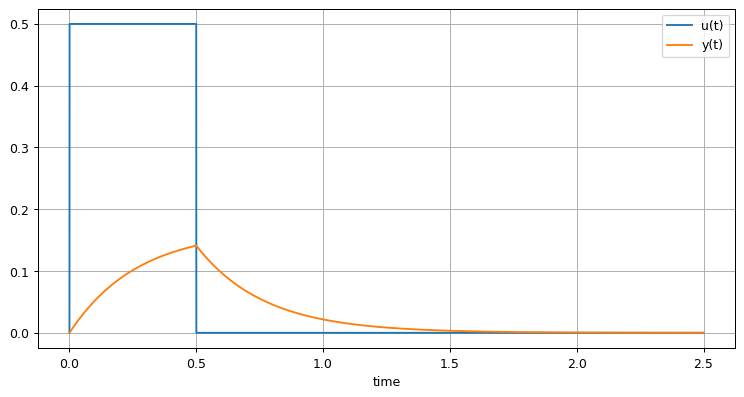

In [264]:
import sympy as sym
from sympy.abc import s,t,x,y,z
import numpy as np 
from sympy.integrals import inverse_laplace_transform,laplace_transform
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

U2 = 0.5/s*sym.exp(0.5*s*0)
U3 = -0.5/s*sym.exp(-0.5*s)

#X_in = (0.5/s)*(1-sym.exp(-0.5*s))
#x_in = sym.inverse_laplace_transform(X_in, s, t)
#sym.plot(x_in, (t, 0, 1), xlabel='$t$', ylabel='$x_{in}(t)$')

R1 = 1
R2 = 2
C = 0.4
A = 1/(R2*C)
G = (1/(R2*C))/(s + ((R2+R1)/(R1*R2*C))) 

Y2 = G * U2
Y3 = G * U3


u2 = inverse_laplace_transform(U2,s,t)
u3 = inverse_laplace_transform(U3,s,t)
y2 = inverse_laplace_transform(Y2,s,t)
y3 = inverse_laplace_transform(Y3,s,t)

tm = np.linspace(-0.000000001,2.5,10000)
us = np.zeros(len(tm))
ys = np.zeros(len(tm))

for u in [u2,u3]:
  for i in range(len(tm)):
      us[i] += u.subs(t,tm[i])
      
for y in [y2,y3]:
  for i in range(len(tm)):
      ys[i] += y.subs(t,tm[i])

plt.figure(figsize=(10, 5), dpi=90)
plt.plot(tm,us,label='u(t)')
plt.plot(tm,ys,label='y(t)')
plt.legend()
plt.grid (True)
plt.xlabel('time')
plt.show()
